In [113]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [114]:
# load csv dataset
df = pd.read_csv("Detalle recorridos 22 sept.csv", delimiter = ',')

In [115]:
df.head(10)

,SECUENCIARECORRIDO,CONSECUTIVOREGISTRO,RECORRIDOFINALIZADO,IDVEHICULO,IDEMPRESA,CODIGORUTA,FECHAREGISTRO,LATITUD,LONGITUD,VELOCIDAD,ESTADOPUERTAS,MARGENDESVIACION,SUBENDELANTERA,SUBENTRASERA,BAJANDELANTERA,BAJANTRASERA,ACUMULADOPASAJEROS
0,231232928,92,S,3279,27,110015,22/09/2020 12:10:27,6.252668,-75.574348,42,DATC,"2,23",0,0,0,0,5
1,231232928,83,S,3279,27,110015,22/09/2020 12:06:55,6.262418,-75.587822,0,DATC,"1,90",0,0,0,0,7
2,231232928,99,S,3279,27,110015,22/09/2020 12:12:49,6.255125,-75.574127,12,DATC,"2,05",0,0,0,1,4
3,231232928,28,S,3279,27,110015,22/09/2020 11:40:35,6.273774,-75.603790,0,DATC,"2,50",0,0,0,0,6
4,231232928,101,S,3279,27,110015,22/09/2020 12:13:19,6.255438,-75.573807,0,DATC,"2,03",0,0,0,0,4
5,231232928,66,S,3279,27,110015,22/09/2020 11:59:03,6.269069,-75.600075,27,DATC,"1,94",0,0,0,0,7
6,231232928,43,S,3279,27,110015,22/09/2020 11:47:47,6.274590,-75.604500,0,DATC,"1,91",0,0,0,0,4
7,231232928,14,S,3279,27,110015,22/09/2020 11:34:45,6.272694,-75.609116,1,DATC,"2,47",0,0,0,0,4
8,231232928,10,S,3279,27,110015,22/09/2020 11:33:22,6.273529,-75.610458,13,DATC,"1,83",0,0,0,0,3
9,231232928,11,S,3279,27,110015,22/09/2020 11:33:31,6.273421,-75.610298,0,DATC,"1,97",0,0,0,0,3


In [116]:
df.columns

Index(['SECUENCIARECORRIDO', 'CONSECUTIVOREGISTRO', 'RECORRIDOFINALIZADO',
       'IDVEHICULO', 'IDEMPRESA', 'CODIGORUTA', 'FECHAREGISTRO', 'LATITUD',
       'LONGITUD', 'VELOCIDAD', 'ESTADOPUERTAS', 'MARGENDESVIACION',
       'SUBENDELANTERA', 'SUBENTRASERA', 'BAJANDELANTERA', 'BAJANTRASERA',
       'ACUMULADOPASAJEROS'],
      dtype='object')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360206 entries, 0 to 3360205
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   SECUENCIARECORRIDO   int64  
 1   CONSECUTIVOREGISTRO  int64  
 2   RECORRIDOFINALIZADO  object 
 3   IDVEHICULO           int64  
 4   IDEMPRESA            int64  
 5   CODIGORUTA           int64  
 6   FECHAREGISTRO        object 
 7   LATITUD              float64
 8   LONGITUD             float64
 9   VELOCIDAD            int64  
 10  ESTADOPUERTAS        object 
 11  MARGENDESVIACION     object 
 12  SUBENDELANTERA       int64  
 13  SUBENTRASERA         int64  
 14  BAJANDELANTERA       int64  
 15  BAJANTRASERA         int64  
 16  ACUMULADOPASAJEROS   int64  
dtypes: float64(2), int64(11), object(4)
memory usage: 435.8+ MB


In [118]:
print("porcentaje de rutas exitosas de la empresa: ")
df.groupby('RECORRIDOFINALIZADO').agg({'RECORRIDOFINALIZADO': 'count'})/df['RECORRIDOFINALIZADO'].size

porcentaje de rutas exitosas de la empresa: 


,RECORRIDOFINALIZADO
RECORRIDOFINALIZADO,
N,0.097027
S,0.902973


In [ ]:
dfff = df.groupby('RECORRIDOFINALIZADO').agg({'RECORRIDOFINALIZADO': 'count'})/df['RECORRIDOFINALIZADO']
dfff.reset_index(inplace=True)
dfff.head()

In [ ]:
print("Cantidad de recorridos: ")
df['RECORRIDOFINALIZADO'].size

In [52]:
#TOTAL SECUENCIAS
print("Cantidad de secuencias unicas: ")
df['SECUENCIARECORRIDO'].unique().size

15319

In [101]:
#SECUENCIAS UNICAS EN ESTADO N
SECU_N = df[df['RECORRIDOFINALIZADO'] == "N"]['SECUENCIARECORRIDO'].unique().size
print(SECU_N)

1708


In [49]:
#% RECORRIDOS EN ESTADO N
df[df['RECORRIDOFINALIZADO'] == "N"]['SECUENCIARECORRIDO'].unique().size/df['SECUENCIARECORRIDO'].unique().size

0.11149552842874862

In [53]:
#EMPRESAS PRESTADORAS DEL SERVICIO
print("Cantidad de empresas prestadoras del servicio: ")
df['IDEMPRESA'].unique().size

Cantidad de empresas prestadoras del servicio: 


41

In [70]:
##EMPRESAS CON CASOS N
n_empresas = df[df['RECORRIDOFINALIZADO'] == "N"]['IDEMPRESA'].unique().size
porcen_empresas = df[df['RECORRIDOFINALIZADO'] == "N"]['IDEMPRESA'].unique().size/df['IDEMPRESA'].unique().size
print("Cantidad : " + str(n_empresas) + ", Porcentaje: " + str(porcen_empresas))

Cantidad : 35, Porcentaje: 0.8536585365853658


In [106]:
#EMPRESAS ESTADO N, TOP 10 Y %
dPFDDD = df[df['RECORRIDOFINALIZADO'] == "N"].groupby('IDEMPRESA').agg({'SECUENCIARECORRIDO': pd.Series.nunique, })
dPFDDD['Porcentaje'] = dPFDDD['SECUENCIARECORRIDO']/SECU_N
dPFDDD.sort_values("SECUENCIARECORRIDO", axis = 0, ascending = False, 
                                    inplace = True, na_position ='last') 

dPFDDD.head(10)

,SECUENCIARECORRIDO,Porcentaje
IDEMPRESA,,
14,580,0.339578
13,341,0.199649
4,128,0.074941
42,54,0.031616
25,53,0.031030
10,48,0.028103
8,45,0.026347
12,37,0.021663
53,37,0.021663


In [152]:
#TOP DE EMPRESAS CON RECORRIDOS N
dPFDDD.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

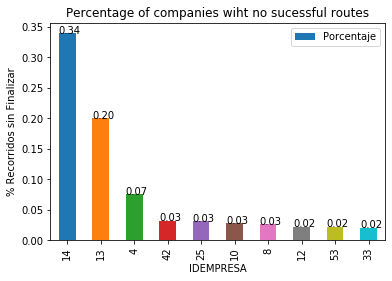

In [148]:
#PLOT EMPRESAS N
from itertools import cycle, islice
my_colors = list(islice(cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']), None, len(dPFDDD[0:10])))
ax = dPFDDD[0:10].plot(x="IDEMPRESA", y="Porcentaje", kind='bar', stacked=True, color=my_colors)
ax.set_ylabel("% Recorridos sin Finalizar")
ax.set_title("Percentage of companies wiht unsuccessful routes")
for patch in ax.patches:
    box = patch.get_bbox()
    value = "{:.2f}".format(box.y1)        
    ax.annotate(value, (box.x0, box.y1))

In [111]:
dPFDDD.head()

,index,IDEMPRESA,SECUENCIARECORRIDO,Porcentaje
0,0,14,580,0.339578
1,1,13,341,0.199649
2,2,4,128,0.074941
3,3,42,54,0.031616
4,4,25,53,0.031030


In [149]:
#VEHICULOS EN ESTADO N
dPR = df[df['RECORRIDOFINALIZADO'] == "N"].groupby('IDVEHICULO').agg({'SECUENCIARECORRIDO': pd.Series.nunique, })
dPR['Porcentaje'] = dPR['SECUENCIARECORRIDO']/SECU_N
dPR.sort_values("SECUENCIARECORRIDO", axis = 0, ascending = False, 
                                    inplace = True, na_position ='last') 
dPR.head(10)

,SECUENCIARECORRIDO,Porcentaje
IDVEHICULO,,
1159,22,0.012881
6185,20,0.011710
6186,18,0.010539
973,16,0.009368
6995,11,0.006440
2990,11,0.006440
6346,10,0.005855
2738,9,0.005269
2773,9,0.005269


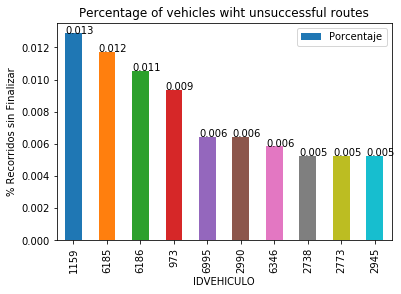

In [155]:
#PLOT VEHICULOS ESTADO N
from itertools import cycle, islice
my_colors = list(islice(cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']), None, len(dPR[0:10])))
ax = dPR[0:10].plot(x="IDVEHICULO", y="Porcentaje", kind='bar', stacked=True, color=my_colors)
ax.set_ylabel("% Recorridos sin Finalizar")
ax.set_title("Percentage of vehicles wiht unsuccessful routes")
for patch in ax.patches:
    box = patch.get_bbox()
    value = "{:.3f}".format(box.y1)        
    ax.annotate(value, (box.x0, box.y1))

In [156]:
#TOP DE VEHICULOS CON RECORRIDOS N
dPR.reset_index(inplace=True)